In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config import weather_api_key
import requests

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
coordinates

[(3.7245035975672494, -113.57051080504208),
 (74.82895948172737, 168.287938336087),
 (-31.701801414254668, -105.51213996372567),
 (66.92898983794265, 170.1669637607955),
 (85.54115348308113, 55.31982885248513),
 (-30.90150804126028, -19.26631229510673),
 (14.147936966817525, 69.91226982051538),
 (-5.587510957845041, -69.94036937858807),
 (27.790147740321785, -57.411848138008),
 (80.88082338989952, -48.84390609606234),
 (-87.54926710617382, 44.922190675651706),
 (-8.66142720239364, -154.35990788333802),
 (58.43387553577145, -157.28322131755502),
 (-21.2238101050348, -15.828910674218008),
 (-42.87015039914393, -99.88911494688621),
 (-68.06723227715163, -33.775111305178825),
 (60.37783678946235, 28.24604785482586),
 (-22.537003213788324, -28.68488862371862),
 (-53.77278611300015, -96.43736162543959),
 (-38.87000823281728, -132.3012243035054),
 (48.322156228252, 162.06120509386233),
 (-9.212596992385087, -179.11610453827936),
 (-2.2797422258022664, -41.64124799507982),
 (26.75857308533007,

In [7]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [9]:
cities

['san patricio',
 'pevek',
 'rikitea',
 'belushya guba',
 'jamestown',
 'malwan',
 'eirunepe',
 'saint george',
 'upernavik',
 'port alfred',
 'faanui',
 'kodiak',
 'castro',
 'ushuaia',
 'primorsk',
 'caravelas',
 'petropavlovsk-kamchatskiy',
 'vaitupu',
 'luis correia',
 'kapaa',
 'constantine',
 'albany',
 'punta arenas',
 'butaritari',
 'dikson',
 'barrow',
 'arraial do cabo',
 'great bend',
 'illoqqortoormiut',
 'saint-philippe',
 'norman wells',
 'hasaki',
 'sistranda',
 'avarua',
 'kavieng',
 'new norfolk',
 'yumen',
 'kahului',
 'illapel',
 'bridlington',
 'qaanaaq',
 'clyde river',
 'guerrero negro',
 'airai',
 'lajong',
 'provideniya',
 'meulaboh',
 'sao joao da barra',
 'najran',
 'victoria',
 'shimoda',
 'loandjili',
 'mineiros',
 'cidreira',
 'parabel',
 'cape town',
 'ahipara',
 'benalla',
 'port elizabeth',
 'maniago',
 'chuy',
 'poum',
 'busselton',
 'ponta delgada',
 'am timan',
 'kuche',
 'bilma',
 'soderhamn',
 'arlit',
 'saldanha',
 'northam',
 'mataura',
 'hobart',

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        #print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | san patricio
Processing Record 2 of Set 13 | pevek
Processing Record 3 of Set 13 | rikitea
Processing Record 4 of Set 13 | belushya guba
Processing Record 5 of Set 13 | jamestown
Processing Record 6 of Set 13 | malwan
Processing Record 7 of Set 13 | eirunepe
Processing Record 8 of Set 13 | saint george
Processing Record 9 of Set 13 | upernavik
Processing Record 10 of Set 13 | port alfred
Processing Record 11 of Set 13 | faanui
Processing Record 12 of Set 13 | kodiak
Processing Record 13 of Set 13 | castro
Processing Record 14 of Set 13 | ushuaia
Processing Record 15 of Set 13 | primorsk
Processing Record 16 of Set 13 | caravelas
Processing Record 17 of Set 13 | petropavlovsk-kamchatskiy
Processing Record 18 of Set 13 | vaitupu
Processing Record 19 of Set 13 | luis correia
Processing Record 20 of Set 13 | kapaa
Processing Record 21 of Set 13 | constantine
Processing Record 22 of Set 13 | albany
P

Processing Record 43 of Set 16 | ossora
Processing Record 44 of Set 16 | khormuj
Processing Record 45 of Set 16 | gat
Processing Record 46 of Set 16 | fort william
Processing Record 47 of Set 16 | dingle
Processing Record 48 of Set 16 | duiwelskloof
Processing Record 49 of Set 16 | vila franca do campo
Processing Record 50 of Set 16 | la romana
Processing Record 1 of Set 17 | jumla
Processing Record 2 of Set 17 | nabire
Processing Record 3 of Set 17 | adrar
Processing Record 4 of Set 17 | rurrenabaque
Processing Record 5 of Set 17 | singaparna
Processing Record 6 of Set 17 | asyut
Processing Record 7 of Set 17 | arcachon
Processing Record 8 of Set 17 | port hueneme
Processing Record 9 of Set 17 | lavrentiya
Processing Record 10 of Set 17 | ponta do sol
Processing Record 11 of Set 17 | along
Processing Record 12 of Set 17 | vila velha
Processing Record 13 of Set 17 | guantanamo
Processing Record 14 of Set 17 | kieta
Processing Record 15 of Set 17 | san rafael
Processing Record 16 of Set

Processing Record 40 of Set 20 | mudyuga
Processing Record 41 of Set 20 | gushikawa
Processing Record 42 of Set 20 | gwadar
Processing Record 43 of Set 20 | burnie
Processing Record 44 of Set 20 | dehloran
Processing Record 45 of Set 20 | amazar
Processing Record 46 of Set 20 | birao
Processing Record 47 of Set 20 | anloga
Processing Record 48 of Set 20 | lang son
Processing Record 49 of Set 20 | tasbuget
Processing Record 50 of Set 20 | ngukurr
Processing Record 1 of Set 21 | uruguaiana
Processing Record 2 of Set 21 | punta alta
Processing Record 3 of Set 21 | louisbourg
Processing Record 4 of Set 21 | qorveh
Processing Record 5 of Set 21 | vostok
Processing Record 6 of Set 21 | coolum beach
Processing Record 7 of Set 21 | pinjaur
Processing Record 8 of Set 21 | ahuimanu
Processing Record 9 of Set 21 | ternate
Processing Record 10 of Set 21 | bonavista
Processing Record 11 of Set 21 | samfya
Processing Record 12 of Set 21 | barentsburg
Processing Record 13 of Set 21 | shinpokh
Process

Processing Record 34 of Set 24 | jutai
Processing Record 35 of Set 24 | oktyabrskiy
Processing Record 36 of Set 24 | gorin
Processing Record 37 of Set 24 | zolotinka
Processing Record 38 of Set 24 | peranamallur
Processing Record 39 of Set 24 | khiv
Processing Record 40 of Set 24 | laguna
Processing Record 41 of Set 24 | pringsewu
Processing Record 42 of Set 24 | bambanglipuro
Processing Record 43 of Set 24 | nicoya
Processing Record 44 of Set 24 | rosignol
Processing Record 45 of Set 24 | acapulco
Processing Record 46 of Set 24 | tapejara
Processing Record 47 of Set 24 | manoel urbano
Processing Record 48 of Set 24 | klaksvik
Processing Record 49 of Set 24 | pandan
Processing Record 50 of Set 24 | brazzaville
Processing Record 1 of Set 25 | tecoanapa
Processing Record 2 of Set 25 | itaituba
Processing Record 3 of Set 25 | clonakilty
Processing Record 4 of Set 25 | morinville
Processing Record 5 of Set 25 | udachnyy
Processing Record 6 of Set 25 | kiruna
Processing Record 7 of Set 25 |

In [12]:
cities

['san patricio',
 'pevek',
 'rikitea',
 'belushya guba',
 'jamestown',
 'malwan',
 'eirunepe',
 'saint george',
 'upernavik',
 'port alfred',
 'faanui',
 'kodiak',
 'castro',
 'ushuaia',
 'primorsk',
 'caravelas',
 'petropavlovsk-kamchatskiy',
 'vaitupu',
 'luis correia',
 'kapaa',
 'constantine',
 'albany',
 'punta arenas',
 'butaritari',
 'dikson',
 'barrow',
 'arraial do cabo',
 'great bend',
 'illoqqortoormiut',
 'saint-philippe',
 'norman wells',
 'hasaki',
 'sistranda',
 'avarua',
 'kavieng',
 'new norfolk',
 'yumen',
 'kahului',
 'illapel',
 'bridlington',
 'qaanaaq',
 'clyde river',
 'guerrero negro',
 'airai',
 'lajong',
 'provideniya',
 'meulaboh',
 'sao joao da barra',
 'najran',
 'victoria',
 'shimoda',
 'loandjili',
 'mineiros',
 'cidreira',
 'parabel',
 'cape town',
 'ahipara',
 'benalla',
 'port elizabeth',
 'maniago',
 'chuy',
 'poum',
 'busselton',
 'ponta delgada',
 'am timan',
 'kuche',
 'bilma',
 'soderhamn',
 'arlit',
 'saldanha',
 'northam',
 'mataura',
 'hobart',

In [13]:
city_data

[{'City': 'San Patricio',
  'Lat': 28.017,
  'Lng': -97.5169,
  'Max Temp': 68,
  'Humidity': 48,
  'Cloudiness': 75,
  'Wind Speed': 14.97,
  'Country': 'US',
  'Date': '2021-04-21 17:37:54'},
 {'City': 'Pevek',
  'Lat': 69.7008,
  'Lng': 170.3133,
  'Max Temp': 20.16,
  'Humidity': 68,
  'Cloudiness': 51,
  'Wind Speed': 18.23,
  'Country': 'RU',
  'Date': '2021-04-21 17:37:55'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 77.99,
  'Humidity': 71,
  'Cloudiness': 40,
  'Wind Speed': 9.89,
  'Country': 'PF',
  'Date': '2021-04-21 17:37:55'},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 32,
  'Humidity': 80,
  'Cloudiness': 90,
  'Wind Speed': 9.22,
  'Country': 'US',
  'Date': '2021-04-21 17:37:29'},
 {'City': 'Eirunepe',
  'Lat': -6.6603,
  'Lng': -69.8736,
  'Max Temp': 85.75,
  'Humidity': 66,
  'Cloudiness': 72,
  'Wind Speed': 2.8,
  'Country': 'BR',
  'Date': '2021-04-21 17:37:55'},
 {'City': 'Saint George',
  'Lat': 37.1

In [14]:
city_weather = requests.get(city_url).json()

In [15]:
city_weather

{'coord': {'lon': -81.7165, 'lat': 43.7501},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 33.8,
  'feels_like': 23.14,
  'temp_min': 33.8,
  'temp_max': 33.8,
  'pressure': 1016,
  'humidity': 75},
 'visibility': 10000,
 'wind': {'speed': 17.27, 'deg': 330},
 'clouds': {'all': 89},
 'dt': 1619026867,
 'sys': {'type': 1,
  'id': 253,
  'country': 'CA',
  'sunrise': 1619001211,
  'sunset': 1619050627},
 'timezone': -14400,
 'id': 5962442,
 'name': 'Goderich',
 'cod': 200}

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,San Patricio,28.0170,-97.5169,68.00,48,75,14.97,US,2021-04-21 17:37:54
1,Pevek,69.7008,170.3133,20.16,68,51,18.23,RU,2021-04-21 17:37:55
2,Rikitea,-23.1203,-134.9692,77.99,71,40,9.89,PF,2021-04-21 17:37:55
3,Jamestown,42.0970,-79.2353,32.00,80,90,9.22,US,2021-04-21 17:37:29
4,Eirunepe,-6.6603,-69.8736,85.75,66,72,2.80,BR,2021-04-21 17:37:55
5,Saint George,37.1041,-113.5841,77.00,10,1,5.75,US,2021-04-21 17:37:56
6,Upernavik,72.7868,-56.1549,18.21,68,66,6.69,GL,2021-04-21 17:37:56
7,Port Alfred,-33.5906,26.8910,70.09,84,90,6.13,ZA,2021-04-21 17:37:56
8,Faanui,-16.4833,-151.7500,81.90,72,38,12.88,PF,2021-04-21 17:37:57
9,Kodiak,57.7900,-152.4072,41.00,87,90,20.71,US,2021-04-21 17:33:15


In [17]:
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]

In [19]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,San Patricio,US,2021-04-21 17:37:54,28.0170,-97.5169,68.00,48,75,14.97
1,Pevek,RU,2021-04-21 17:37:55,69.7008,170.3133,20.16,68,51,18.23
2,Rikitea,PF,2021-04-21 17:37:55,-23.1203,-134.9692,77.99,71,40,9.89
3,Jamestown,US,2021-04-21 17:37:29,42.0970,-79.2353,32.00,80,90,9.22
4,Eirunepe,BR,2021-04-21 17:37:55,-6.6603,-69.8736,85.75,66,72,2.80


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [22]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1619026929.2363713

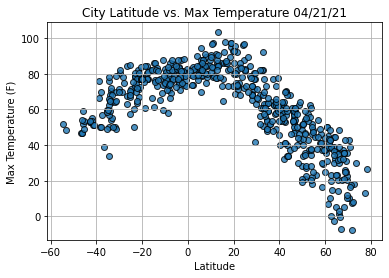

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

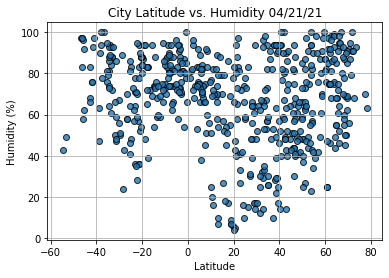

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

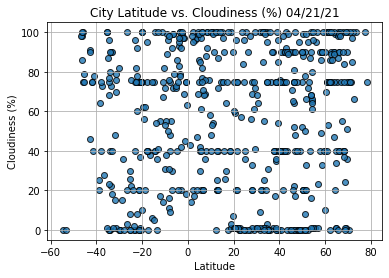

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()